In [2]:
import sympy as sy
import numpy as np
sy.init_printing(use_latex=True)

## Problem 1
### (a)
Zero-order-hold sampling 

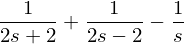

In [6]:
s,z,h = sy.symbols('s,z,h')
sy.apart(1/(s*(s+1)*(s-1)))




In [14]:

num = (0.5 * (sy.exp(h) + sy.exp(-h)) - 1)*(z+1)
den = (z**2 - (sy.exp(h) + sy.exp(-h))*z + 1)
H = num/den
print num

(z + 1)*(0.5*exp(h) - 1 + 0.5*exp(-h))


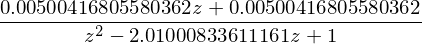

In [15]:
H.subs(h, 0.1)

### (b)
Backward difference approximation of given continuous-time controller

In [36]:
s,z = sy.symbols('s, z')
h = sy.symbols('h', positive=True)
F = (16*s+1)/(100*s+1)
H = sy.simplify(F.subs(s, (z-1)/(z*h)))
print H

(h*z + 16*z - 16)/(h*z + 100*z - 100)


In [6]:
p1,p2,p3,p4 = sy.symbols('p1, p2, p3, p4') 

sy.expand((z-0.7+sy.I*0.1)*(z-0.7-sy.I*0.1))


## Problem 2
Calculate the pulse transfer function from the disturbance d to the output y


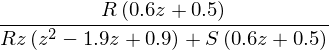

In [10]:
B = 0.6*z + 0.5
A = z*(z**2 - 1.9*z + 0.9)
S, R = sy.symbols('S, R')

H_dy = (B/A) / (1 + (B/A)*(S/R))
sy.simplify(H_dy)

In [13]:
H_dys = sy.simplify(H_dy)
s=sy.latex(H_dys)
print s

\frac{R \left(0.6 z + 0.5\right)}{R z \left(z^{2} - 1.9 z + 0.9\right) + S \left(0.6 z + 0.5\right)}


## Problem 3
Find the diagonal form of the system in problem 2, but without the time delay

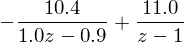

In [18]:
H = sy.simplify(z*B/A)
sy.apart(H)

Set up the state-space model. Make sure it is correct.

In [20]:
Phi = sy.Matrix([[0.9, 0], [0, 1]])
Gamma = sy.Matrix([[1],[1]])
Cm = sy.Matrix([[-10.4, 11.0]])

Htest = Cm*(z*sy.eye(2)-Phi).inv()*Gamma
Htest
                

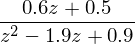

In [21]:
H

### (c) Finding the feedback gain

In [26]:
l1, l2 = sy.symbols('l1, l2')
L = sy.Matrix([[l1, l2]])
sy.factor((z*sy.eye(2) - (Phi - Gamma*L)).det(), z)

In [38]:
sy.simplify(sy.expand((z-0.6+sy.I*0.3)*(z-0.6-sy.I*0.3)))

# Check with matlab

In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-4d29d37c-5632-4ec9-913b-670fa8e16c20
Send 'exit' command to kill the server
.....MATLAB started and connected!


/home/kjartan/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


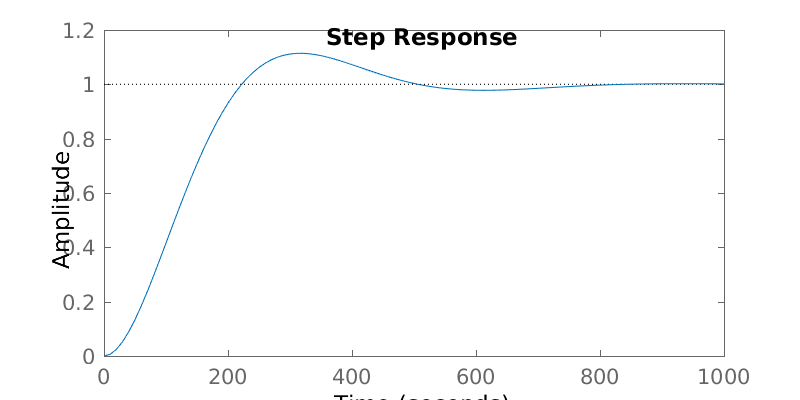

In [23]:
%%matlab  --size 800,400

%Mean arteriar pressure, automatic anasthesia model
% Plant
G = tf([1], [120 1 0]);

a = 1/100;
b = 1/160;
F0 = zpk([-b], [-a], a/b);

K = 1e-2;
F = K*F0;

Gc = feedback(G*F, 1);
step(Gc, 1000)

In [30]:
%%matlab --size 800,400 -o L,y,t
h = 40.0;
Phi = [0.9 0; 0 1]; 
Gamma = [1;1]; 
C = [-10.4  11.0]; 
D = 0;
sys = ss(Phi, Gamma, C, D, h);
L = place(Phi, Gamma, [0.6+i*0.3 0.6-i*0.3]);
sys_cl = ss(Phi-Gamma*L, Gamma, C, D, h);
[y, t] = step(sys_cl);

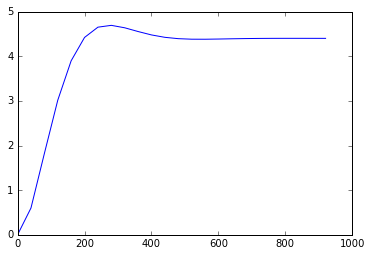

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(t, y)